In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
ram = pd.read_csv("ram_price.csv")

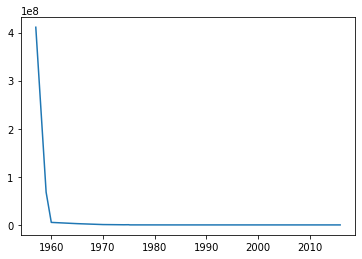

In [11]:
plt.plot(ram.date, ram.price)

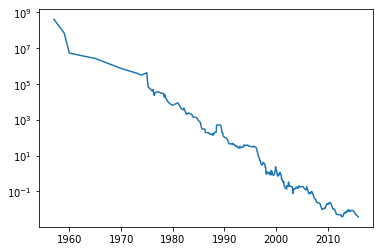

In [5]:
plt.semilogy(ram.date, ram.price)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np 

In [12]:
data_train = ram[ram.date < 2000]
data_test = ram[ram.date >= 2000]

print('before:', data_train.date.shape)
X_train = data_train.date[:, np.newaxis]
print('after:', X_train.shape)

y_train = np.log(data_train.price)   # y값 변형 log 취함 

before: (202,)
after: (202, 1)


In [8]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [9]:
X_all = ram.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

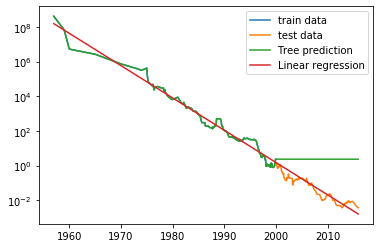

In [10]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram.date, price_tree, label="Tree prediction")
plt.semilogy(ram.date, price_lr, label="Linear regression")
plt.legend() 
plt.show()